## No restrictions on error of parallax

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.integrate as integrate
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
g = np.genfromtxt('beers_gaia_data_csv',skip_header=1,delimiter=',')

# bp_rp 142
# rp 139
# bp 134
# g 129
# parallax 88
# parallax error 89
# E(B-V) 32
# B-V 12

# find out how many parallaxes are negative, and how many parallaxes are NaN

x=0
for line in g:
    if line[88] <= 0:
        x=x+1
        
y=0
for line in g:
    if np.isnan(line[88]) == True:
        y=y+1
                
print('Total number of objects in file:',int(np.size(np.transpose(g)[0])))
print('Number of non-positive parallaxes:',x)
print('Number of objects without a measurement for the parallax:',y)
        
# remove non-positive parallaxes and lines where parallax is NaN by creating array
# containing the indices of the lines where that is the case:

a=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[int(i)][88] <= 0) or (np.isnan(g[int(i)][88]) == True):
        a=np.append(a,i)

a = a.astype(int)        # np.delete wants integers
        
g = np.transpose(np.delete(g,a,0))   # transpose since columns and rows are mixed up

# assign for better readability

parallax = g[88]          # in mas
parallax_e = g[89]        # in mas
G = g[129]                 # in mag
bp_rp = g[142]             # in mag
E_B_V = g[32]             # in mag
B_V = g[12]             # in mag
B_V_0 = B_V - E_B_V     # in mag

Total number of objects in file: 1351
Number of non-positive parallaxes: 48
Number of objects without a measurement for the parallax: 5


In [3]:
# define e_bp_rp calculated from fit
# linear fit, since at the edges there aren't many objects anyway

bp_rp_0 = 0.9604*B_V_0 + 0.2473

e_bp_rp = bp_rp - bp_rp_0

# extinction in G band

c1=0.9761*np.ones(np.size(G))
c2=-0.1704*np.ones(np.size(G))
c3=0.0086*np.ones(np.size(G))
c4=0.0011*np.ones(np.size(G))
c5=-0.0438*np.ones(np.size(G))
c6=0.0013*np.ones(np.size(G))
c7=0.0099*np.ones(np.size(G))

A_0=3.1*E_B_V

k_G=c1+c2*bp_rp_0+c3*bp_rp_0**2+c4*bp_rp_0**3+c5*A_0+c6*A_0**2+c7*bp_rp_0*A_0

A_G=k_G*A_0

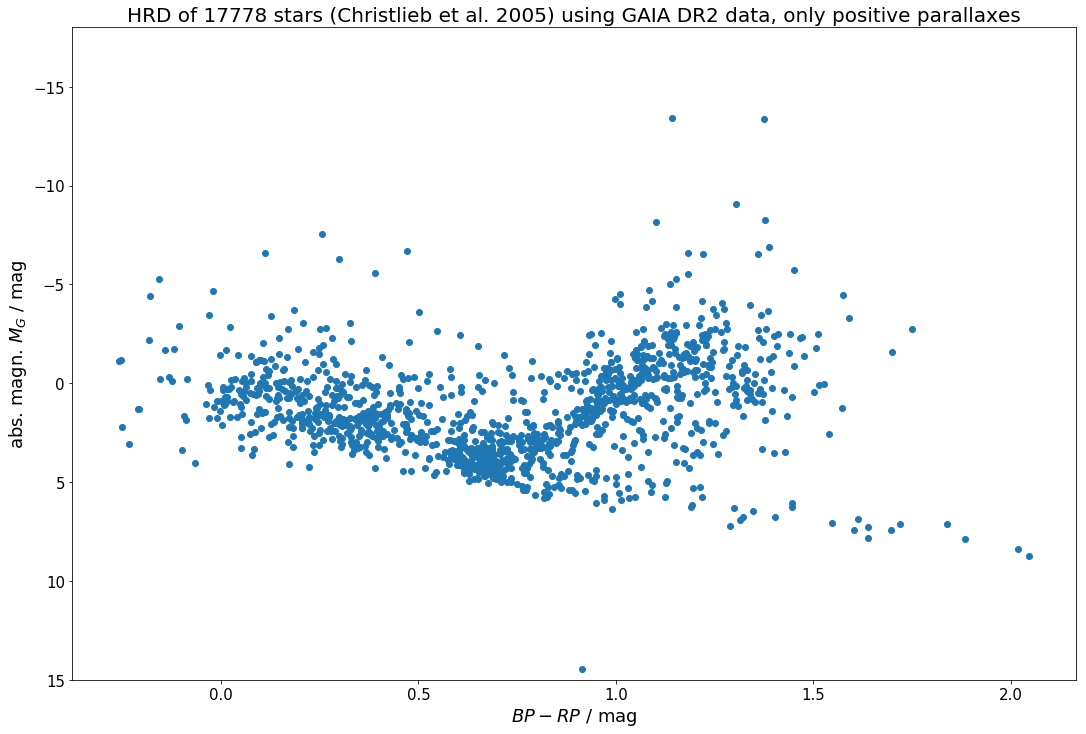

In [4]:
M_G = G + 5 + 5*np.log10(parallax/1000) - A_G # absolute magnitude in mag, derived using the distance modulus

plt.figure(figsize=(18,12))
plt.scatter(bp_rp,M_G)
plt.ylim(15,-18)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$BP-RP$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('HRD of 17778 stars (Christlieb et al. 2005) using GAIA DR2 data, only positive parallaxes',size=20)
plt.savefig('Abbildungen/HRD_1351stars_without_conditions.png')

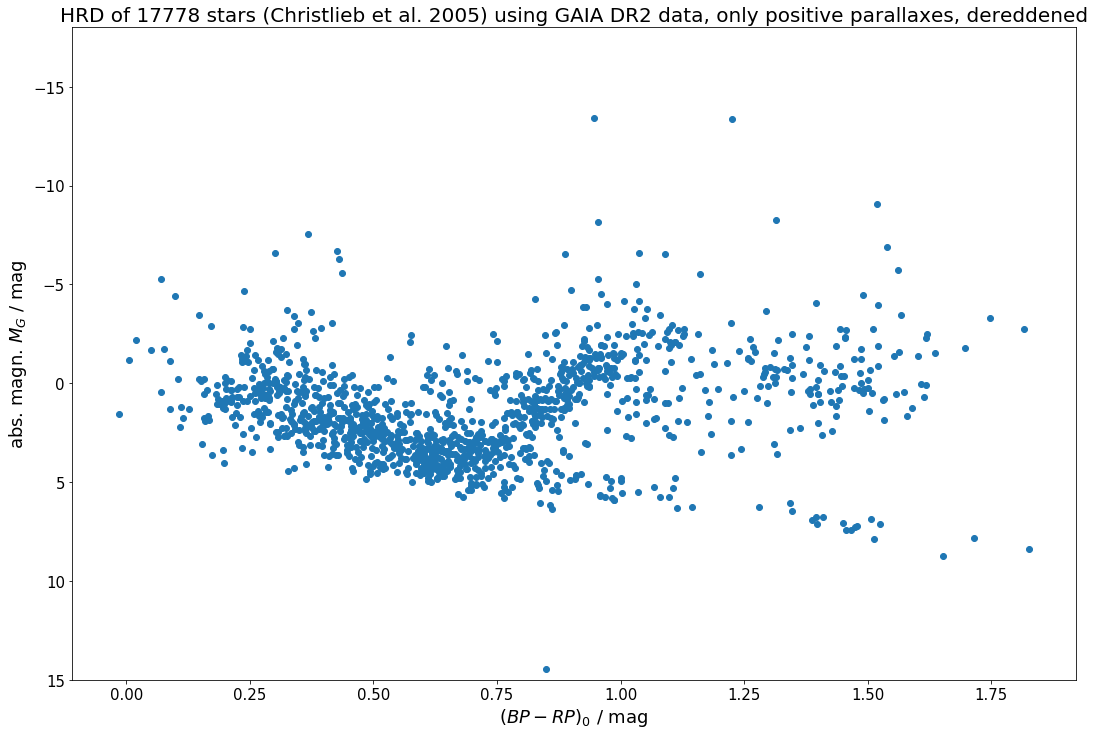

In [5]:
M_G = G + 5 + 5*np.log10(parallax/1000) -A_G # absolute magnitude in mag, derived using the distance modulus

plt.figure(figsize=(18,12))
plt.scatter(bp_rp_0,M_G)
plt.ylim(15,-18)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$(BP-RP)_0$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('HRD of 17778 stars (Christlieb et al. 2005) using GAIA DR2 data, only positive parallaxes, dereddened',size=20)
plt.savefig('Abbildungen/HRD_1351stars_dered.png')

## Relative parallax error must be smaller than 20%

In [6]:
g = np.genfromtxt('beers_gaia_data_csv',skip_header=1,delimiter=',')

# find out how many parallaxes are negative, and how many parallaxes are NaN

x=0
for line in g:
    if line[88] <= 0:
        x=x+1
        
y=0
for line in g:
    if np.isnan(line[88]) == True:
        y=y+1
        
# note that for some lines, both the parallax are NaN
        
print('Total number of objects in file:',int(np.size(np.transpose(g)[0])))
print('Number of non-positive parallaxes:',x)
print('Number of objects without a measurement for the parallax:',y)
# remove non-positive parallaxes and lines where bp_rp or parallax is NaN by creating array
# containing the indices of the lines where that is the case:

a=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[int(i)][88] <= 0) or (np.isnan(g[int(i)][88]) == True):
        a=np.append(a,i)

a = a.astype(int)        # np.delete wants integers
        
g = np.transpose(np.delete(g,a,0))   # transpose since columns and rows are mixed up

Total number of objects in file: 1351
Number of non-positive parallaxes: 48
Number of objects without a measurement for the parallax: 5


In [7]:
g1 = np.transpose(g)

# find out how many parallaxes' relative precision is too unprecise

t=0
for line in g1:
    if np.abs(line[90]) < 5:
        t=t+1
        
print('Number of parallaxes with relative precision worse than 20% (of remaining 1298 objects):',t)
print('Number of objects left to plot:',int(np.size(np.transpose(g1)[0])-t))

# remove objects where parallax/parallax_error < 5 as above

b=np.array([])
for i in np.arange(int(np.size(np.transpose(g1)[0]))):
    if np.abs(g1[i][90]) <= 5:
        b=np.append(b,i)
        
b = b.astype(int)

g1 = np.transpose(np.delete(g1,b,0))

parallax20 = g1[88]
parallax_e20 = g1[89]
G20 = g1[129]
bp_rp20 = g1[142]
E_B_V20 = g1[32]
B_V20 = g1[12]

bp_rp_020 = 0.9604*B_V20 + 0.2473

e_bp_rp020 = bp_rp20 - bp_rp_020

# extinction in G band

c1=0.9761*np.ones(np.size(G20))
c2=-0.1704*np.ones(np.size(G20))
c3=0.0086*np.ones(np.size(G20))
c4=0.0011*np.ones(np.size(G20))
c5=-0.0438*np.ones(np.size(G20))
c6=0.0013*np.ones(np.size(G20))
c7=0.0099*np.ones(np.size(G20))

A_020=3.1*E_B_V20

k_G20=c1+c2*bp_rp_020+c3*bp_rp_020**2+c4*bp_rp_020**3+c5*A_020+c6*A_020**2+c7*bp_rp_020*A_020

A_G20=k_G20*A_020

Number of parallaxes with relative precision worse than 20% (of remaining 1298 objects): 474
Number of objects left to plot: 824


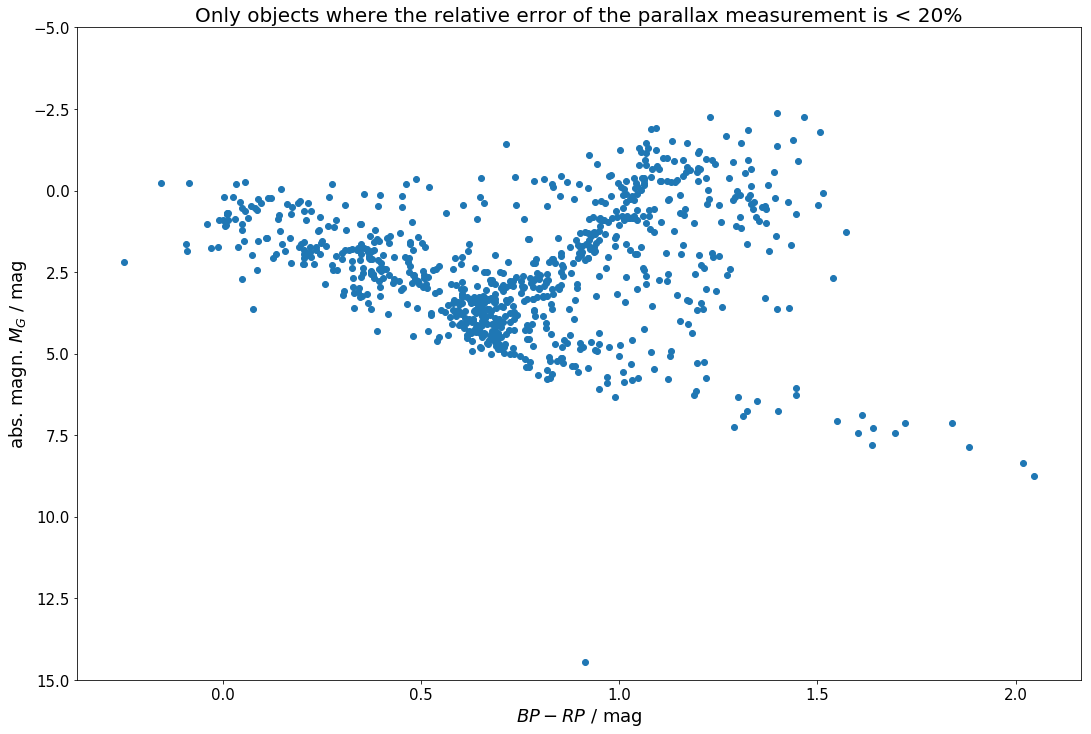

In [8]:
M_G20 = G20 + 5 + 5*np.log10(parallax20/1000) - A_G20  # absolute magnitude in mag, derived using the distance modulus
                                            # parallax is in mas --> factor 1/1000

plt.figure(figsize=(18,12))
plt.scatter(bp_rp20,M_G20)
plt.ylim(15,-5)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('$BP-RP$ / mag',size=18)
plt.ylabel('abs. magn. $M_G$ / mag',size=18)
plt.title('Only objects where the relative error of the parallax measurement is < 20%',size=20)
plt.savefig('Abbildungen/HRD_1351stars_paral_prec.png')

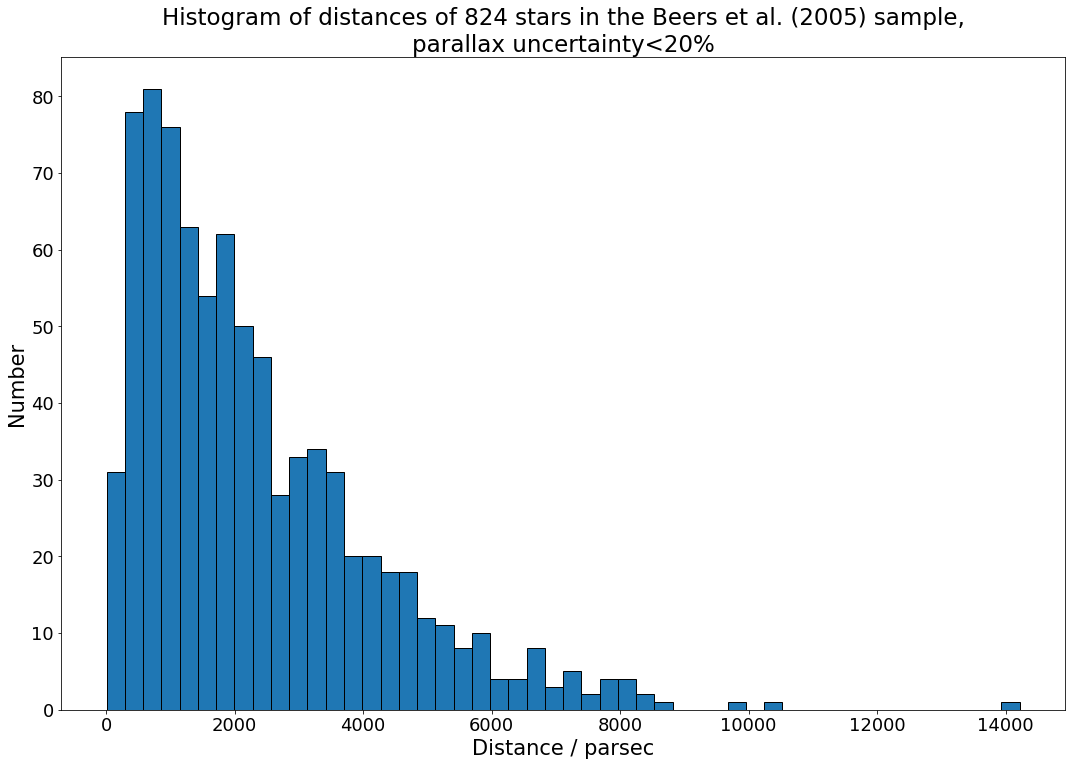

In [9]:
distance20 = 1000/parallax20

plt.figure(figsize=(18,12))
plt.hist(distance20,50,edgecolor='black')
plt.xlabel('Distance / parsec',size=21)
plt.ylabel('Number',size=21)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Histogram of distances of 824 stars in the Beers et al. (2005) sample,\nparallax uncertainty<20%',size=23)
plt.savefig('Abbildungen/distances_2ndsample.png')

In [10]:
# to create a table with all that I've calculated; first find out indices 
# which will have NaN due to parallax condition: stored in a

g = np.genfromtxt('beers_gaia_data_csv',skip_header=1,delimiter=',')

a=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[int(i)][88] <= 0) or (np.isnan(g[int(i)][88]) == True) or (np.abs(g[i][90]) <= 5):
        a=np.append(a,i)

# indices not in a
b=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[int(i)][88] > 0) and (np.isnan(g[int(i)][88]) == False) and (np.abs(g[i][90]) > 5):
        b=np.append(b,i)
        
a = a.astype(int)        # np.delete wants integers
        
g = np.transpose(np.delete(g,a,0))   # transpose since columns and rows are mixed up

In [11]:
abs_mag=np.zeros(1351)

for i in a:
    abs_mag[i]=np.nan

for i in range(np.size(M_G20)):
    abs_mag[int(b[i])]=M_G20[i]


extinc=np.zeros(1351)

for i in a:
    extinc[i]=np.nan

for i in range(np.size(M_G20)):
    extinc[int(b[i])]=A_G20[i]
    

colourr=np.zeros(1351)

for i in a:
    colourr[i]=np.nan

for i in range(np.size(M_G20)):
    colourr[int(b[i])]=bp_rp_020[i]
    
    
distanz=np.zeros(1351)

for i in a:
    distanz[i]=np.nan

for i in range(np.size(M_G20)):
    distanz[int(b[i])]=distance20[i]
    
    
df = pd.read_csv(r'beers_gaia_data_csv')

abs_magn = pd.DataFrame(data = abs_mag,columns=['M_G'])
extinction = pd.DataFrame(data = extinc,columns=['A_G'])
colour = pd.DataFrame(data = colourr,columns=['bp_rp0'])
distance = pd.DataFrame(data = distanz,columns=['distance'])

new = pd.concat([df['Star'],df['source_id_cone'],df['ra_cone'],df['dec_cone'],df['parallax_cone'],df['parallax_error_cone'],df['phot_g_mean_mag_cone'],df['bp_rp_cone'],abs_magn,extinction,colour,distance],axis=1)

new.rename(columns={'source_id_cone':'source_id','ra_cone':'ra','dec_cone':'dec','parallax_cone':'parallax','parallax_error_cone':'parallax_error','phot_g_mean_mag_cone':'Gmag','bp_rp_cone':'bp_rp'},inplace=True)

new.to_csv('2ndsample.csv',index=False)

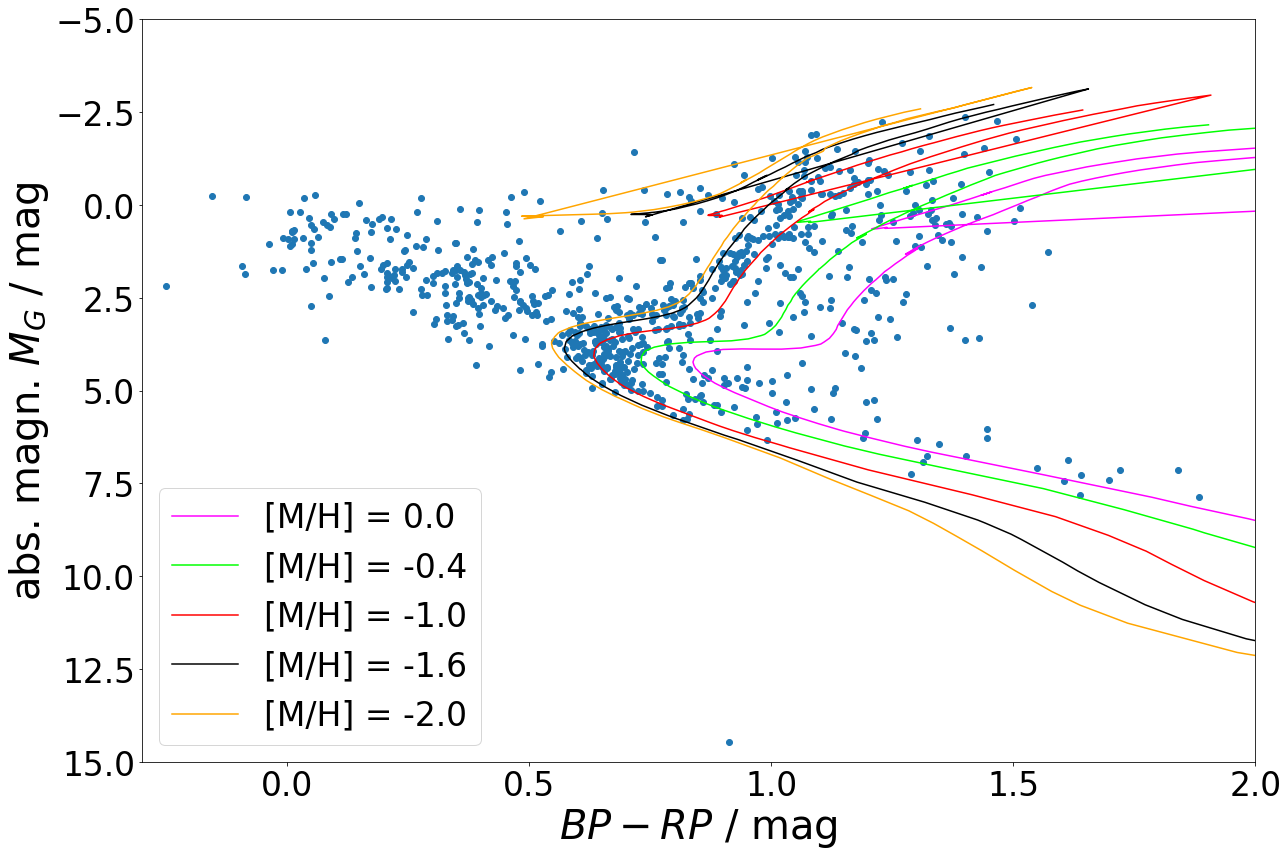

In [12]:
M_G20 = G20 + 5 + 5*np.log10(parallax20/1000) -A_G20   # absolute magnitude in mag, derived using the distance modulus
                                            # parallax is in mas --> factor 1/1000
    
iso0 = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__0_0.txt',skip_header=12,skip_footer=12))
iso01 = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__0_4.txt',skip_header=12,skip_footer=12))
iso1 = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__1_0.txt',skip_header=12,skip_footer=12))
iso2 = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__1_6.txt',skip_header=12,skip_footer=12))
iso3 = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__2_0.txt',skip_header=12,skip_footer=12))
    
plt.figure(figsize=(18,12))
plt.scatter(bp_rp20,M_G20)
plt.plot(iso0[12]-iso0[13],iso0[11],label='[M/H] = 0.0',color='magenta')
plt.plot(iso01[12]-iso01[13],iso01[11],label='[M/H] = -0.4',color='lime')
plt.plot(iso1[12]-iso1[13],iso1[11],label='[M/H] = -1.0',color='r')
plt.plot(iso2[12]-iso2[13],iso2[11],label='[M/H] = -1.6',color='black')
plt.plot(iso3[12]-iso3[13],iso3[11],label='[M/H] = -2.0',color='orange')
plt.ylim(15,-5)
plt.xlim(-0.3,2)
plt.yticks(size=33)
plt.xticks(size=33)
plt.legend(fontsize=33)
plt.xlabel('$BP-RP$ / mag',size=40)
plt.ylabel('abs. magn. $M_G$ / mag',size=40)
plt.tight_layout()
#plt.title('Only objects where the relative error of the parallax measurement is < 20%, with isochrones (12Gyr)',size=20)
plt.savefig('Abbildungen/HRD_1351stars_paral_prec_iso.png')

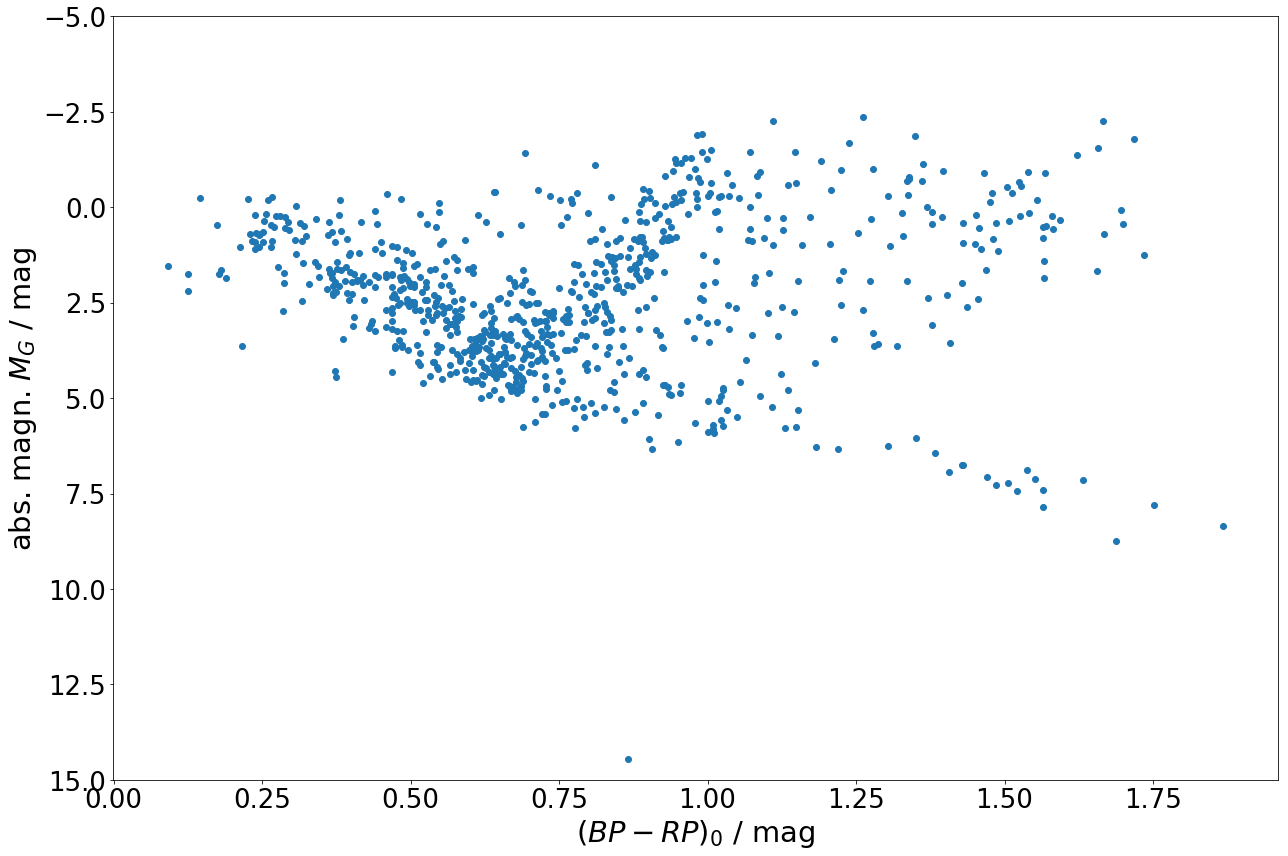

In [13]:
M_G20 = G20 + 5 + 5*np.log10(parallax20/1000) - A_G20 # absolute magnitude in mag, derived using the distance modulus

plt.figure(figsize=(18,12))
plt.scatter(bp_rp_020,M_G20)
plt.ylim(15,-5)
plt.yticks(size=26)
plt.xticks(size=26)
plt.xlabel('$(BP-RP)_0$ / mag',size=29)
plt.ylabel('abs. magn. $M_G$ / mag',size=29)
plt.tight_layout()
#plt.title('Only objects where the relative error of the parallax measurement is < 20%, dereddened',size=20)
plt.savefig('Abbildungen/HRD_1351stars_paral_prec_dered.png')

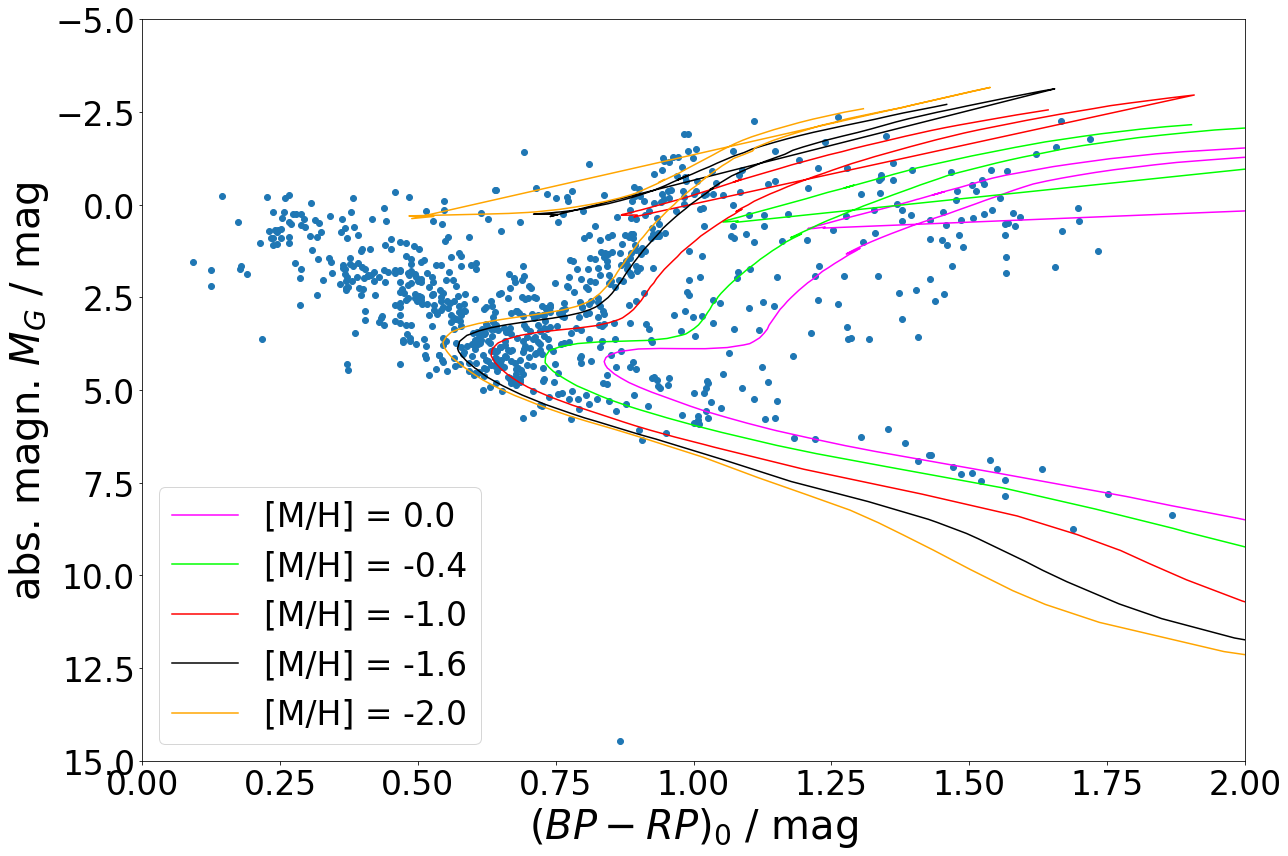

In [14]:
M_G20 = G20 + 5 + 5*np.log10(parallax20/1000) - A_G20 # absolute magnitude in mag, derived using the distance modulus

plt.figure(figsize=(18,12))
plt.scatter(bp_rp_020,M_G20)
plt.plot(iso0[12]-iso0[13],iso0[11],label='[M/H] = 0.0',color='magenta')
plt.plot(iso01[12]-iso01[13],iso01[11],label='[M/H] = -0.4',color='lime')
plt.plot(iso1[12]-iso1[13],iso1[11],label='[M/H] = -1.0',color='r')
plt.plot(iso2[12]-iso2[13],iso2[11],label='[M/H] = -1.6',color='black')
plt.plot(iso3[12]-iso3[13],iso3[11],label='[M/H] = -2.0',color='orange')
plt.ylim(15,-5)
plt.xlim(0,2)
plt.yticks(size=33)
plt.xticks(size=33)
plt.xlabel('$(BP-RP)_0$ / mag',size=40)
plt.ylabel('abs. magn. $M_G$ / mag',size=40)
plt.legend(fontsize=33)
plt.tight_layout()
#plt.title('Only objects where the relative error of the parallax measurement\n is < 20%, dereddened, with isochrones (12Gyr)',size=20)
plt.savefig('Abbildungen/HRD_1351stars_paral_prec_dered_iso.png')